In [19]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

In [20]:
workspace = Path("..")
model_id = "20240527_2226_02sampler-b16-e800-w111-aug-xyz-d03-lr1e-4-wd0005-scaling_fold4"
tasks = ["segmentation", "noduletype", "malignancy"]

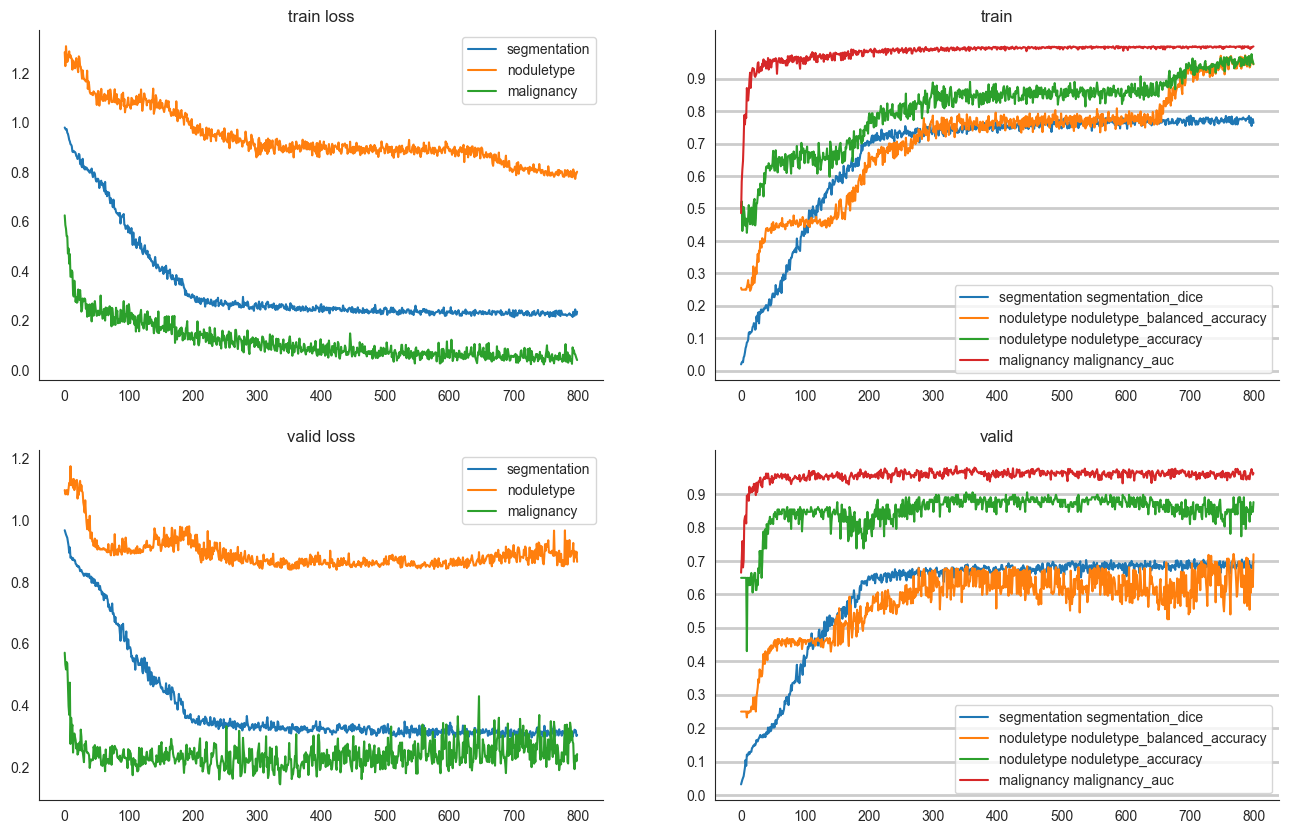

In [21]:
metrics = np.load(workspace / "results" / model_id / "metrics.npy", allow_pickle=True).item()

fig, axes = plt.subplots(2,2, figsize=(16,10))
for y, mode in enumerate(["train", "valid"]):
    ax = axes[y, 0]
    for task in tasks:
        ax.plot(
            [metrics[mode][i][f"loss_{task}"] for i in range(len(metrics[mode]))],
            label=task,
        )
    ax.legend()
    ax.set_title(f"{mode} loss")
    # ax.ylim([0, 2])
    sns.despine()

task_specific_metrics = {
    "segmentation": ["segmentation_dice"],
    "malignancy": ["malignancy_auc"],
    "noduletype": ["noduletype_balanced_accuracy", "noduletype_accuracy"],
}

for y, mode in enumerate(["train", "valid"]):
    ax = axes[y, 1]
    for task in tasks:
        for metric in task_specific_metrics[task]:
            ax.plot(
                [metrics[mode][i][metric] for i in range(len(metrics[mode]))],
                label=f"{task} {metric}",
            )
    ax.legend()
    ax.set_title(f"{mode}")
    # ax.ylim([0, 1])
    ax.set_yticks(np.arange(0,1, 0.5), minor=True)
    ax.set_yticks(np.arange(0,1, 0.1), minor=False)
    ax.grid(which="major", axis="y", linewidth=2)
    ax.grid(which="minor", axis="y", linewidth=1)
    sns.despine()

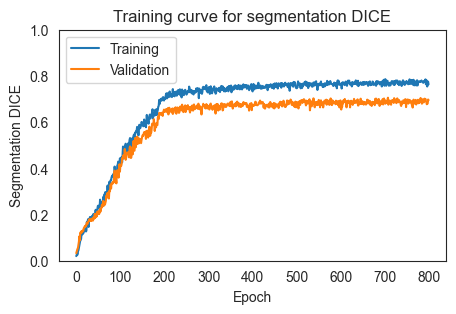

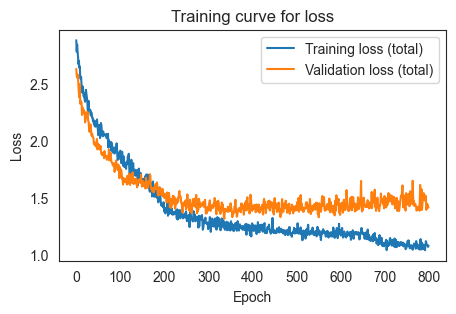

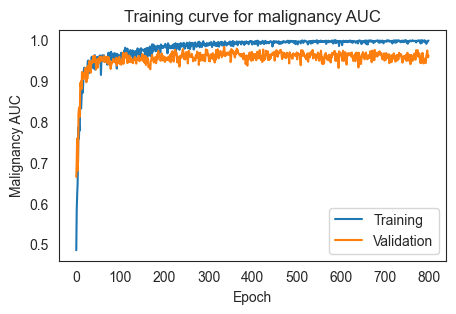

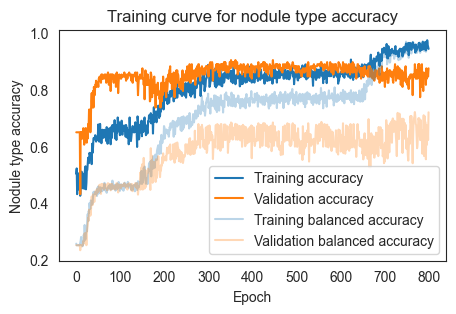

In [29]:
plt.figure(figsize=(5,3))
for mode, metric, label in [
    ("train", "segmentation_dice", "Training"),
    ("valid", "segmentation_dice", "Validation"),
]:
    plt.plot(
        [metrics[mode][i][metric] for i in range(len(metrics[mode]))],
        label=label,
    )

plt.ylim([0, 1])
plt.ylabel("Segmentation DICE")
plt.title("Training curve for segmentation DICE")
plt.xlabel("Epoch")
plt.legend()
plt.show()

plt.figure(figsize=(5,3))
for mode, metric, label in [
    ("train", "loss_total", "Training loss (total)"),
    ("valid", "loss_total", "Validation loss (total)"),
#     ("train", "loss_segmentation", "Training loss (segmentation)"),
#     ("valid", "loss_segmentation", "Validation loss (segmentation)"),
#     ("train", "loss_noduletype", "Training loss (noduletype)"),
#     ("valid", "loss_noduletype", "Validation loss (noduletype)"),
#     ("train", "loss_malignancy", "Training loss (malinancy)"),
#     ("valid", "loss_malignancy", "Validation loss (malignancy)"),
]:
    plt.plot(
        [metrics[mode][i][metric] for i in range(len(metrics[mode]))],
        label=label,
    )

plt.ylabel("Loss")
plt.title("Training curve for loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# plt.figure()
# for mode, metric, label in [
#     ("train", "loss_segmentation", "Training loss (segmentation)"),
#     ("valid", "loss_segmentation", "Validation loss (segmentation)"),
#     ("train", "loss_noduletype", "Training loss (noduletype)"),
#     ("valid", "loss_noduletype", "Validation loss (noduletype)"),
#     ("train", "loss_malignancy", "Training loss (malinancy)"),
#     ("valid", "loss_malignancy", "Validation loss (malignancy)"),
# ]:
#     plt.plot(
#         [metrics[mode][i][metric] for i in range(len(metrics[mode]))],
#         label=label,
#     )

# plt.ylabel("Loss")
# plt.title("Training curve for malignancy loss")
# plt.xlabel("Epoch")
# plt.legend()
# plt.show()

plt.figure(figsize=(5,3))
for mode, metric, label in [
    ("train", "malignancy_auc", "Training"),
    ("valid", "malignancy_auc", "Validation"),
#     ("train", "loss_segmentation", "Training loss (segmentation)"),
#     ("valid", "loss_segmentation", "Validation loss (segmentation)"),
#     ("train", "loss_noduletype", "Training loss (noduletype)"),
#     ("valid", "loss_noduletype", "Validation loss (noduletype)"),
#     ("train", "loss_malignancy", "Training loss (malinancy)"),
#     ("valid", "loss_malignancy", "Validation loss (malignancy)"),
]:
    plt.plot(
        [metrics[mode][i][metric] for i in range(len(metrics[mode]))],
        label=label,
    )

plt.ylabel("Malignancy AUC")
plt.title("Training curve for malignancy AUC")
plt.xlabel("Epoch")
plt.legend()
plt.show()

plt.figure(figsize=(5,3))
for mode, metric, label, alpha, color in [
    ("train", "noduletype_accuracy", "Training accuracy", 1, "tab:blue"),
    ("valid", "noduletype_accuracy", "Validation accuracy", 1, "tab:orange"),
    ("train", "noduletype_balanced_accuracy", "Training balanced accuracy", 0.3, "tab:blue"),
    ("valid", "noduletype_balanced_accuracy", "Validation balanced accuracy", 0.3, "tab:orange"),
#     ("train", "loss_segmentation", "Training loss (segmentation)"),
#     ("valid", "loss_segmentation", "Validation loss (segmentation)"),
#     ("train", "loss_noduletype", "Training loss (noduletype)"),
#     ("valid", "loss_noduletype", "Validation loss (noduletype)"),
#     ("train", "loss_malignancy", "Training loss (malinancy)"),
#     ("valid", "loss_malignancy", "Validation loss (malignancy)"),
]:
    plt.plot(
        [metrics[mode][i][metric] for i in range(len(metrics[mode]))],
        label=label,
        alpha=alpha,
        color=color,
    )

plt.ylabel("Nodule type accuracy")
plt.title("Training curve for nodule type accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [23]:
T

NameError: name 'T' is not defined